In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, datasets, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

***Loading the Dataset***

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

***Normalizing the Pixel values***

In [8]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

***Building the CNN Model***

In [9]:
model = models.Sequential()

***Adding convolutional layers***

In [10]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


***Adding a flatten layer and fully connected layers***

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

***Compiling the Model***

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

***Training***

In [13]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2702 - loss: 1.9478 - val_accuracy: 0.5138 - val_loss: 1.3385
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.5066 - loss: 1.3676 - val_accuracy: 0.5855 - val_loss: 1.1633
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.5778 - loss: 1.2004 - val_accuracy: 0.6033 - val_loss: 1.1143
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.6233 - loss: 1.0843 - val_accuracy: 0.6584 - val_loss: 0.9666
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6534 - loss: 0.9918 - val_accuracy: 0.6521 - val_loss: 1.0070
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.6788 - loss: 0.9190 - val_accuracy: 0.6849 - val_loss: 0.9035
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7036 - loss: 0.8571 - val_accuracy: 0.6947 - val_loss: 0.8792
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.7141 - loss: 0.8153 - 

***Evaluation***

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7218 - loss: 0.9352
Test accuracy: 0.7175999879837036


In [15]:
pred_labels = np.argmax(model.predict(test_images), axis=1)
print(classification_report(test_labels, pred_labels, target_names=[str(i) for i in range(10)]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.85      0.85      0.85      1000
           2       0.66      0.58      0.62      1000
           3       0.51      0.56      0.53      1000
           4       0.70      0.62      0.66      1000
           5       0.57      0.70      0.62      1000
           6       0.81      0.74      0.78      1000
           7       0.73      0.77      0.75      1000
           8       0.87      0.76      0.81      1000
           9       0.82      0.80      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



***Plotting a Training and Validation Accuracy VS Epochs***

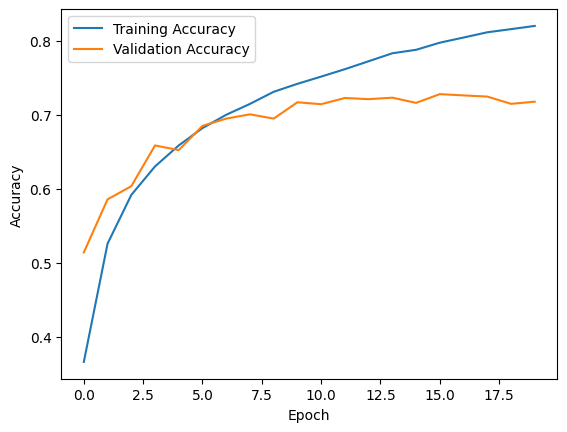

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***Plotting training and validation loss over epochs***

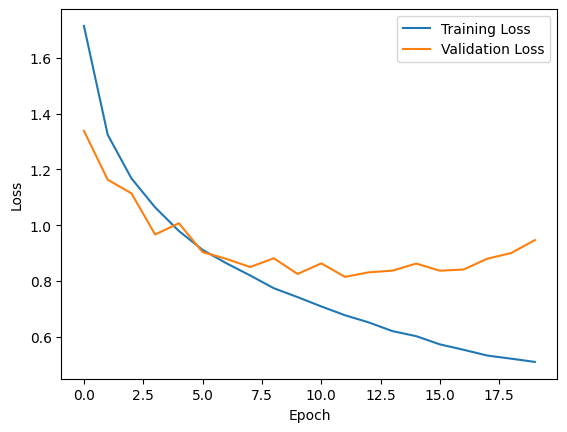

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()